# Compare the performance of models (loss/accuracy, latency)

The models to compare will  be:
* ResNet18
* ResNet50
* VGG16
* MobileNetV3 - small
* MobileNetV3 - large
* EfficientNet

In [1]:
from pathlib import Path
import pandas as pd
from timeit import default_timer as timer

from utils import *
from dataloaders import *
from data_preparation import *
from allResNets import *
from VGGs import *
from MobileNetV3 import *
from engine import *

change_to_disk()
data_dir = Path("split_1k/")

In [2]:
data_transform = transforms.Compose([
    # Resize our images to 224x224
    transforms.Resize(size=(224, 224)),
    # Flip the images randomly on the horizontal and vertical (just to make it as independent from the position of the pipeline)
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    # Turn the image into a torch.Tensor
    transforms.ToTensor(),
    
    # Normalize
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])

BATCH_SIZE = 32
train_dl, validation_dl, test_dl, train_data, validation_data, test_data, class_names = create_dataloaders(data_dir, data_transform, batch_size = BATCH_SIZE)

In [3]:
# Things to play with
# Hyperparameters -> NUM_EPOCHS - 100 | Learning_rate - 0.001 
# Functions -> Optimizer - Rprop | Loss Function - Cross Entropy Loss

NUM_EPOCHS = 50
lr = 0.001
device = get_device()

resnet18 = ResNet18()
resnet50 = ResNet50()
vgg16 = VGG16()
mobnet_sml = MobileNetV3("small")
mobnet_lrg = MobileNetV3("large")

loss_fn = nn.CrossEntropyLoss()

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.4200 | train_acc: 0.8187 | validation_loss: 0.3358 | validation_acc: 0.8590
Epoch: 2 | train_loss: 0.3443 | train_acc: 0.8490 | validation_loss: 0.3077 | validation_acc: 0.8680
Epoch: 3 | train_loss: 0.3367 | train_acc: 0.8638 | validation_loss: 0.2995 | validation_acc: 0.8621
Epoch: 4 | train_loss: 0.3312 | train_acc: 0.8590 | validation_loss: 0.2798 | validation_acc: 0.8922
Epoch: 5 | train_loss: 0.3295 | train_acc: 0.8530 | validation_loss: 0.2793 | validation_acc: 0.8777
Epoch: 6 | train_loss: 0.3183 | train_acc: 0.8660 | validation_loss: 0.2747 | validation_acc: 0.8895
Epoch: 7 | train_loss: 0.3232 | train_acc: 0.8655 | validation_loss: 0.2669 | validation_acc: 0.8914
Epoch: 8 | train_loss: 0.3227 | train_acc: 0.8635 | validation_loss: 0.2537 | validation_acc: 0.8992
Epoch: 9 | train_loss: 0.3165 | train_acc: 0.8665 | validation_loss: 0.2753 | validation_acc: 0.8758
Epoch: 10 | train_loss: 0.3079 | train_acc: 0.8698 | validation_loss: 0.2481 | validation_a

(None,
 <function utils.plot_confusion_matrix(model, dataloader, device, classes)>)

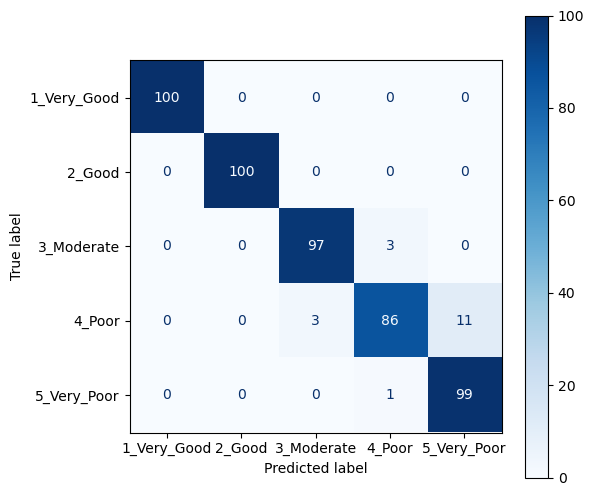

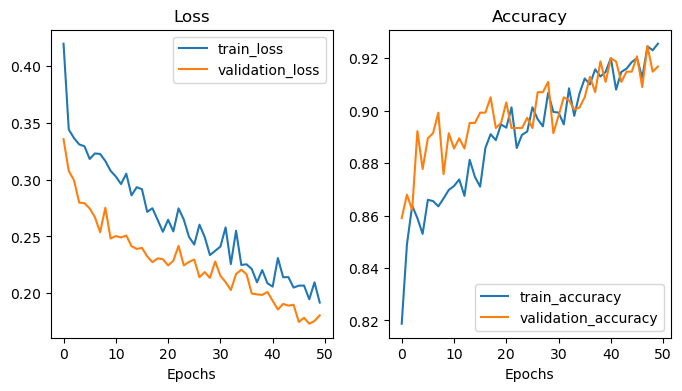

In [4]:
#Train ResNet18
resnet18.to(device)
rprop_optim = torch.optim.Rprop(params=resnet18.parameters(), lr=lr)
train_resnet18_results, train_time_resnet18 = train(resnet18, train_dl, validation_dl, optimizer=rprop_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, device=device)

plot_confusion_matrix(resnet18, test_dl, device, class_names)
print(f"ResNet18 Results")
plot_loss_curves(train_resnet18_results), plot_confusion_matrix

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.6224 | train_acc: 0.7220 | validation_loss: 0.4053 | validation_acc: 0.8238
Epoch: 2 | train_loss: 0.4519 | train_acc: 0.7977 | validation_loss: 0.3790 | validation_acc: 0.8184
Epoch: 3 | train_loss: 0.4385 | train_acc: 0.7965 | validation_loss: 0.3651 | validation_acc: 0.8219
Epoch: 4 | train_loss: 0.4465 | train_acc: 0.8027 | validation_loss: 0.3555 | validation_acc: 0.8281
Epoch: 5 | train_loss: 0.3918 | train_acc: 0.8175 | validation_loss: 0.3528 | validation_acc: 0.8340
Epoch: 6 | train_loss: 0.4294 | train_acc: 0.8127 | validation_loss: 0.3488 | validation_acc: 0.8320
Epoch: 7 | train_loss: 0.4136 | train_acc: 0.8155 | validation_loss: 0.3390 | validation_acc: 0.8426
Epoch: 8 | train_loss: 0.3936 | train_acc: 0.8197 | validation_loss: 0.3384 | validation_acc: 0.8359
Epoch: 9 | train_loss: 0.3774 | train_acc: 0.8325 | validation_loss: 0.3266 | validation_acc: 0.8512
Epoch: 10 | train_loss: 0.3922 | train_acc: 0.8275 | validation_loss: 0.3177 | validation_a

(None,
 <function utils.plot_confusion_matrix(model, dataloader, device, classes)>)

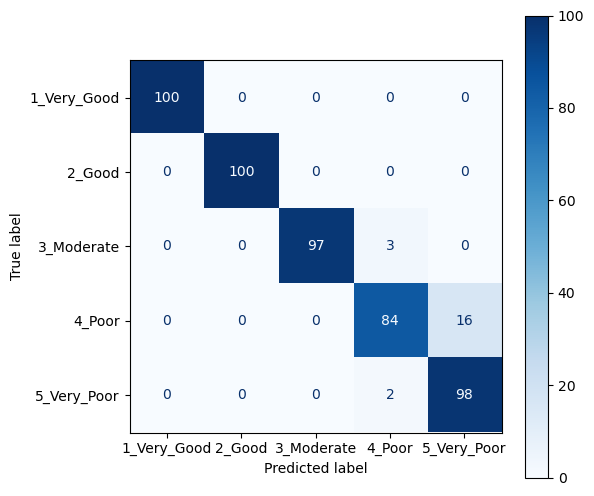

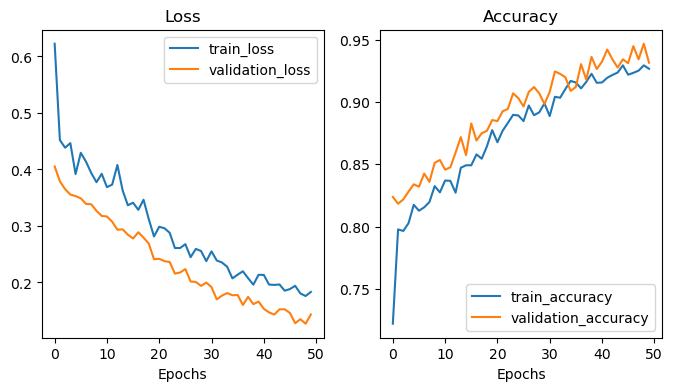

In [5]:
#Train ResNet50
resnet50.to(device)
rprop_optim = torch.optim.Rprop(params=resnet50.parameters(), lr=lr)
train_resnet50_results, train_time_resnet50 = train(resnet50, train_dl, validation_dl, optimizer=rprop_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, device=device)

plot_confusion_matrix(resnet50, test_dl, device, class_names)
print(f"ResNet50 Results")
plot_loss_curves(train_resnet50_results), plot_confusion_matrix

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 5.1527 | train_acc: 0.5695 | validation_loss: 1.5727 | validation_acc: 0.7348
Epoch: 2 | train_loss: 10.1994 | train_acc: 0.6625 | validation_loss: 8.0689 | validation_acc: 0.7551
Epoch: 3 | train_loss: 15.6724 | train_acc: 0.6545 | validation_loss: 0.7619 | validation_acc: 0.7523
Epoch: 4 | train_loss: 14.1760 | train_acc: 0.6445 | validation_loss: 3.0371 | validation_acc: 0.7148
Epoch: 5 | train_loss: 17.0803 | train_acc: 0.6498 | validation_loss: 2.2548 | validation_acc: 0.7488
Epoch: 6 | train_loss: 11.6516 | train_acc: 0.6605 | validation_loss: 0.6442 | validation_acc: 0.7695
Epoch: 7 | train_loss: 10.4163 | train_acc: 0.6760 | validation_loss: 0.5884 | validation_acc: 0.7836
Epoch: 8 | train_loss: 13.7059 | train_acc: 0.6723 | validation_loss: 1.6584 | validation_acc: 0.7918
Epoch: 9 | train_loss: 23.8434 | train_acc: 0.6560 | validation_loss: 0.5873 | validation_acc: 0.7543
Epoch: 10 | train_loss: 16.4453 | train_acc: 0.6895 | validation_loss: 0.7092 | val

(None,
 <function utils.plot_confusion_matrix(model, dataloader, device, classes)>)

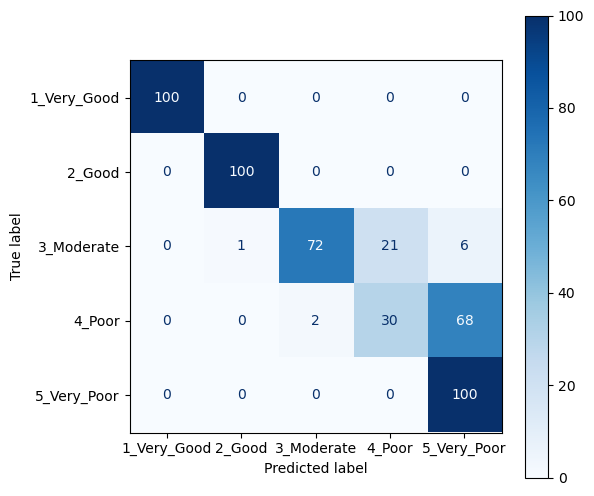

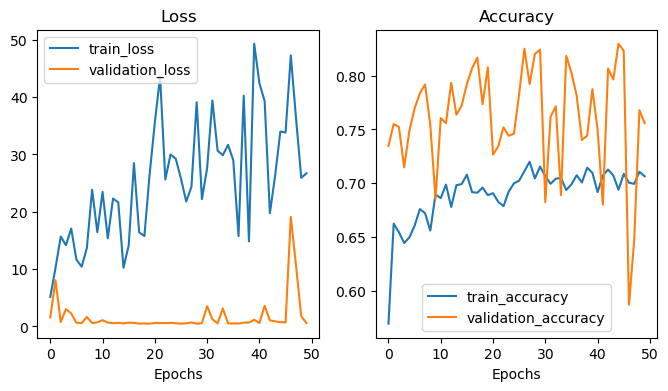

In [6]:
#Train VGG16
vgg16.to(device)
rprop_optim = torch.optim.Rprop(params=vgg16.parameters(), lr=lr)
train_vgg16_results, train_time_vgg16 = train(vgg16, train_dl, validation_dl, optimizer=rprop_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, device=device)

plot_confusion_matrix(vgg16, test_dl, device, class_names)
print(f"VGG16 Results")
plot_loss_curves(train_vgg16_results), plot_confusion_matrix

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.7199 | train_acc: 0.7067 | validation_loss: 0.4420 | validation_acc: 0.7840
Epoch: 2 | train_loss: 1.3412 | train_acc: 0.7362 | validation_loss: 0.4267 | validation_acc: 0.7941
Epoch: 3 | train_loss: 1.1078 | train_acc: 0.7440 | validation_loss: 0.4244 | validation_acc: 0.7906
Epoch: 4 | train_loss: 0.8454 | train_acc: 0.7548 | validation_loss: 0.4205 | validation_acc: 0.7918
Epoch: 5 | train_loss: 1.1653 | train_acc: 0.7520 | validation_loss: 0.4197 | validation_acc: 0.8012
Epoch: 6 | train_loss: 1.5422 | train_acc: 0.7442 | validation_loss: 0.4183 | validation_acc: 0.8000
Epoch: 7 | train_loss: 1.2929 | train_acc: 0.7460 | validation_loss: 0.4228 | validation_acc: 0.7895
Epoch: 8 | train_loss: 0.9840 | train_acc: 0.7542 | validation_loss: 0.4035 | validation_acc: 0.7949
Epoch: 9 | train_loss: 1.3164 | train_acc: 0.7500 | validation_loss: 0.4004 | validation_acc: 0.7988
Epoch: 10 | train_loss: 1.2135 | train_acc: 0.7582 | validation_loss: 0.4071 | validation_a

(None,
 <function utils.plot_confusion_matrix(model, dataloader, device, classes)>)

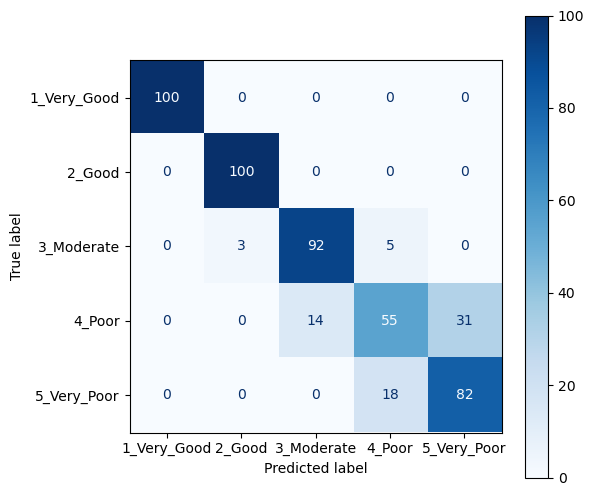

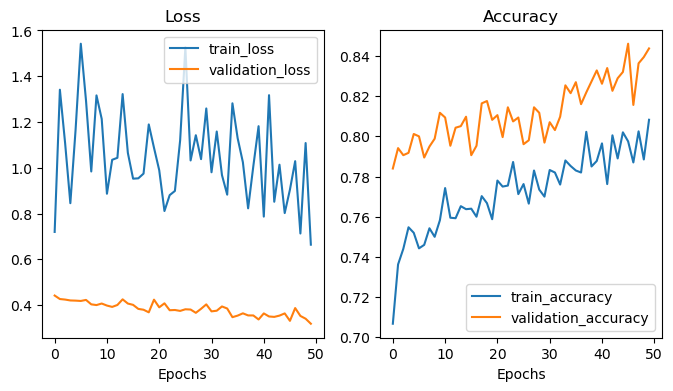

In [7]:
#Train MobileNet Large
mobnet_lrg.to(device)
rprop_optim = torch.optim.Rprop(params=mobnet_lrg.parameters(), lr=lr)
train_mobnet_lrg_results, train_time_mobnet_lgr = train(mobnet_lrg, train_dl, validation_dl, optimizer=rprop_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, device=device)

plot_confusion_matrix(mobnet_lrg, test_dl, device, class_names)
print(f"MobileNetV3 (Large) Results")
plot_loss_curves(train_mobnet_lrg_results), plot_confusion_matrix

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.8146 | train_acc: 0.7160 | validation_loss: 0.6644 | validation_acc: 0.7715
Epoch: 2 | train_loss: 2.4257 | train_acc: 0.7635 | validation_loss: 0.8148 | validation_acc: 0.7633
Epoch: 3 | train_loss: 1.9112 | train_acc: 0.7675 | validation_loss: 0.4598 | validation_acc: 0.7879
Epoch: 4 | train_loss: 1.7481 | train_acc: 0.7658 | validation_loss: 0.4972 | validation_acc: 0.8129
Epoch: 5 | train_loss: 1.7267 | train_acc: 0.7688 | validation_loss: 0.5071 | validation_acc: 0.7910
Epoch: 6 | train_loss: 1.3161 | train_acc: 0.7805 | validation_loss: 0.5035 | validation_acc: 0.7996
Epoch: 7 | train_loss: 1.2450 | train_acc: 0.7830 | validation_loss: 0.4381 | validation_acc: 0.7859
Epoch: 8 | train_loss: 1.4985 | train_acc: 0.7795 | validation_loss: 0.5312 | validation_acc: 0.7859
Epoch: 9 | train_loss: 1.3803 | train_acc: 0.7778 | validation_loss: 0.4032 | validation_acc: 0.7949
Epoch: 10 | train_loss: 1.1200 | train_acc: 0.7970 | validation_loss: 0.3966 | validation_a

(None,
 <function utils.plot_confusion_matrix(model, dataloader, device, classes)>)

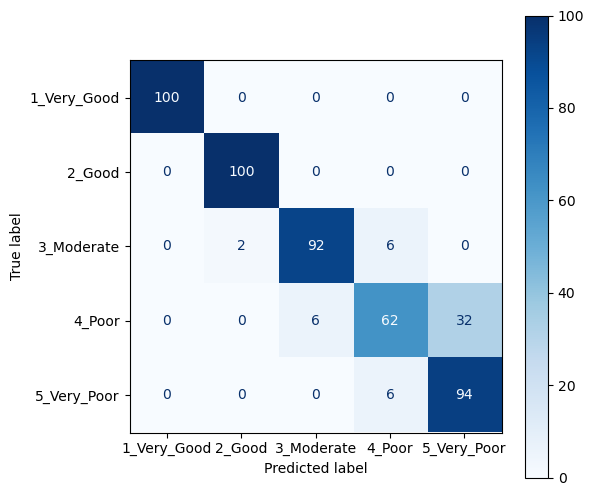

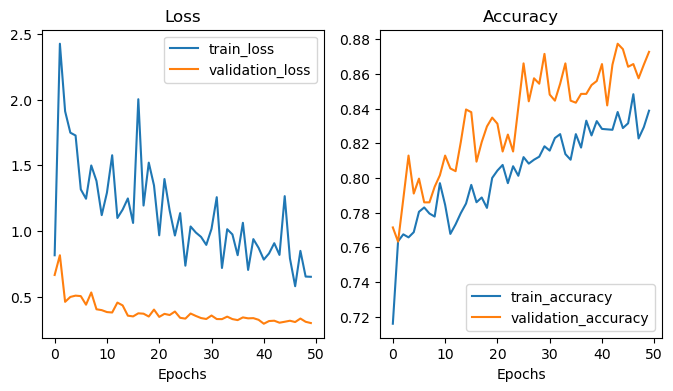

In [8]:
#Train MobileNet Small
mobnet_sml.to(device)
rprop_optim = torch.optim.Rprop(params=mobnet_sml.parameters(), lr=lr)
train_mobnet_sml_results, train_time_mobnet_sml = train(mobnet_sml, train_dl, validation_dl, optimizer=rprop_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, device=device)

plot_confusion_matrix(mobnet_sml, test_dl, device, class_names)
print(f"MobileNetV3 (Small) Results")
plot_loss_curves(train_mobnet_sml_results), plot_confusion_matrix

In [9]:
#Train EfficientNet ...

In [10]:
results_resnet18 = eval_model(model = resnet18, data_loader = test_dl, loss_fn = loss_fn, accuracy_fn = accuracy_fn, device = device, dummy_input = torch.rand(32,3,224,224).to(device))
results_resnet50 = eval_model(model = resnet50, data_loader = test_dl, loss_fn = loss_fn, accuracy_fn = accuracy_fn, device = device, dummy_input = torch.rand(32,3,224,224).to(device))
#results_vgg16 = eval_model(model = vgg16, data_loader = test_dl, loss_fn = loss_fn, accuracy_fn = accuracy_fn, device = device, dummy_input = torch.rand(32,3,224,224).to(device))
results_mobnet_lrg = eval_model(model = mobnet_lrg, data_loader = test_dl, loss_fn = loss_fn, accuracy_fn = accuracy_fn, device = device, dummy_input = torch.rand(32,3,224,224).to(device))
results_mobnet_sml = eval_model(model = mobnet_sml, data_loader = test_dl, loss_fn = loss_fn, accuracy_fn = accuracy_fn, device = device, dummy_input = torch.rand(32,3,224,224).to(device))

all_results = pd.DataFrame([
    results_resnet18,
    results_resnet50,
    #results_vgg16,
    results_mobnet_sml,
    results_mobnet_lrg])

  0%|          | 0/16 [00:01<?, ?it/s]

  0%|          | 0/16 [00:01<?, ?it/s]

  0%|          | 0/16 [00:01<?, ?it/s]

  0%|          | 0/16 [00:01<?, ?it/s]